The following code block mounts google drive to to Colab so that we can access our data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/test_220810/data_220810/"
!pwd
!ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/test_220810/data_220810
/content/drive/My Drive/Colab Notebooks/test_220810/data_220810
 PEGS-master	    'Puckett Thesis.pdf'   Results
 PhotoelasticDisks   requirements.txt	  'Zhao et al 2019.pdf'


The following code block imports important python packages.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle, PathPatch, Rectangle
import numpy as np

The following code block defines a calculator for the G^2 value within a circular disk centered in an image.

In [2]:
def g2Calculator(rad,imBWcp):
  gtmp = 0
  counter = 0
  for ii in range(imBWcp.shape[0]-1):
    for jj in range(imBWcp.shape[1]-1):
      dists = (ii-imBWcp.shape[0]/2)**2+(jj-imBWcp.shape[1]/2)**2
      if dists < rad**2:
        gtmp += 1/4*( ((imBWcp[ii-1,jj]-imBWcp[ii+1,jj])/2)**2+((imBWcp[ii-1,jj-1]-imBWcp[ii+1,jj+1])/np.sqrt(8))**2+\
               ((imBWcp[ii,jj-1]-imBWcp[ii,jj+1])/2)**2+((imBWcp[ii+1,jj-1]-imBWcp[ii-1,jj+1])/np.sqrt(8))**2 )
        counter += 1
  return (gtmp*rad**2*(1/10000)**2)
               

The following code block imports images of our sample, computes G^2, then renders the values on an image of the sample next to a regular photoelasticity image.

ALERTPhotoelasticity 220929_v1.ipynb data_220810
Icon?


<Figure size 864x864 with 0 Axes>

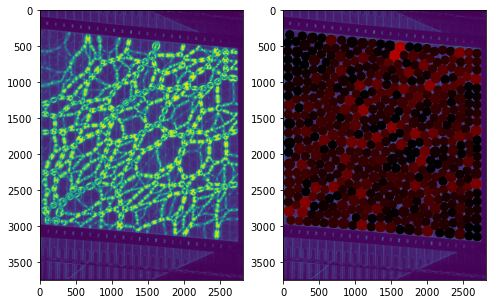

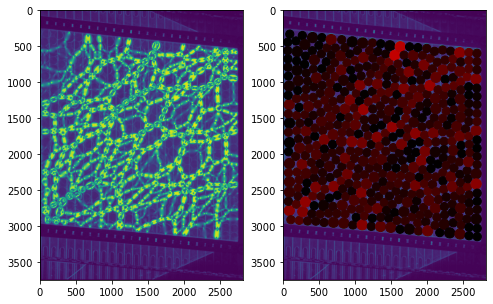

KeyboardInterrupt: 

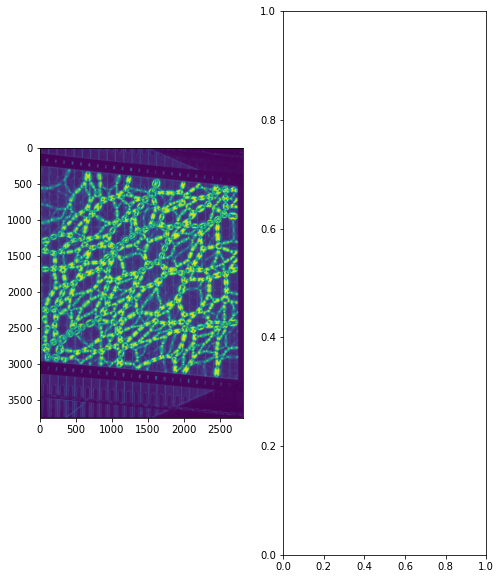

In [3]:
fig = plt.figure(figsize=(12,12))
!ls
numbers = range(35,71)
for ii in range(70):
  # Import centers
  tmp=open('data_220810/PhotoelasticDisks/Positions/Pos_'+str(numbers[ii]).zfill(4)+'.txt','r')
  Lines = tmp.readlines()

  # Create a position array for the 511 grains in the sample
  pos = np.zeros((511,3))

  # Parse text file with positions
  counter = 0
  for line in Lines:
    tmp2 = np.fromstring(line, dtype=float, sep=' ')
    pos[counter,:] = tmp2
    counter += 1
  # Get positions and radii of grains from file in arrays x,y,rads
  x = pos[:,0]
  y = pos[:,1]
  rads = pos[:,2]
    
  # Import photoelastic images
  im = mpimg.imread('data_220810/PhotoelasticDisks/P_Image/P_'+str(numbers[ii]).zfill(4)+'.JPG')
  imBW = 0.2989 * im[:,:,0] + 0.5870 * im[:,:,1] + 0.1140 * im[:,:,2] # Change this to extract different colors
  
  # Perform the G^2 calculation within each grain
  # First create an empty G^2 array
  g2 = np.zeros((511,))
  itr = 0
  fig, ax = plt.subplots(1,2,figsize=(8,10))

  # Loop over each particle, calculate G^2
  ax[0].imshow(imBW)
  for xx,yy,rad in zip(x,y,rads):
    imCrop = imBW[int(np.round(yy-rad)):int(np.round(yy+rad)),int(np.round(xx-rad)):int(np.round(xx+rad))]
    #circ = Circle((xx, yy), rad, color='red', fill=False)
    #ax[0].add_patch(circ)
    g2[itr] = g2Calculator(rad,imCrop)
    itr += 1
  
  ax[1].imshow(imBW)
  g2max = 35
  itr = 0
    
  # Loop over each particle, plot G^2 on particle
  for xx,yy,rad in zip(x,y,rads):
    circ = Circle((xx, yy), rad, color=(g2[itr]/g2max,0,0))
    ax[1].add_patch(circ)
    itr += 1
    
  # Save images of G^2 and values to text file
  plt.savefig('data_220810/PhotoelasticDisks/G2images/g2_'+str(numbers[ii]).zfill(4)+'.jpg')
  plt.show()
  np.savetxt('data_220810/PhotoelasticDisks/G2images/g2values_'+str(numbers[ii]).zfill(4)+'.txt',g2)
  
  

Make figures with photoelastic images and unpolarized light images with radii highlighted.

In [ ]:
fig = plt.figure(figsize=(12,12))
!ls
numbers = range(1,71)
for ii in range(70):
  # Import centers
  tmp=open('PhotoelasticDisks/Positions/Pos_'+str(numbers[ii]).zfill(4)+'.txt','r')
  Lines = tmp.readlines()
  # Create a position array for the 511 grains in the sample
  pos = np.zeros((511,3))
  counter = 0
  for line in Lines:
    tmp2 = np.fromstring(line, dtype=float, sep=' ')
    pos[counter,:] = tmp2
    counter += 1
  # Get positions and radii of grains from file in arrays x,y,rads
  x = pos[:,0]
  y = pos[:,1]
  rads = pos[:,2]
  # Import photoelastic images
  im = mpimg.imread('PhotoelasticDisks/P_Image/P_'+str(numbers[ii]).zfill(4)+'.JPG')
  im2 = mpimg.imread('PhotoelasticDisks/N_Image/N_'+str(numbers[ii]).zfill(4)+'.JPG')
  imBW = 0.2989 * im[:,:,0] + 0.5870 * im[:,:,1] + 0.1140 * im[:,:,2]
  
  # Perform the G^2 calculation within each grain
  # First create an empty G^2 array
  
  g2 = np.zeros((511,))
  itr = 0
  fig, ax = plt.subplots(1,2,figsize=(8,10))
  ax[0].imshow(imBW)
  for xx,yy,rad in zip(x,y,rads):
    #imCrop = imBW[int(np.round(yy-rad)):int(np.round(yy+rad)),int(np.round(xx-rad)):int(np.round(xx+rad))]
    circ = Circle((xx, yy), rad, color='red', fill=False)
    ax[0].add_patch(circ)
    #g2[itr] = g2Calculator(rad,imCrop)
    itr += 1
  
  ax[1].imshow(im2)
  itr = 0
  for xx,yy,rad in zip(x,y,rads):
    circ = Circle((xx, yy), rad, color='red', fill=False)
    ax[1].add_patch(circ)
    itr += 1
  
  plt.savefig('PhotoelasticDisks/radii_highlighted/radii_'+str(numbers[ii]).zfill(4)+'.jpg')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.